# Week 3 - Bayesian Optimization

Generate optimized recommendations for Week 3 using utility modules.

## Setup

In [47]:
import numpy as np
import sys
sys.path.append('..')  # Add parent directory to path

# Import utility modules
from utils.bayesian_optimization import propose_next_point, get_strategy
from utils.data_utils import (
    load_week_data,
    save_week_data,
    combine_with_week_results, 
    print_data_summary
)
from utils.visualization import visualize_all_functions

## 1. Load Week 2 Data

Load the combined data from Week 2 (includes initial + Week 1 results)

In [48]:
# Load Week 2 clean data (initial + Week 1)
inputs, outputs = load_week_data("../week 2/week2_clean_data.npz")
print_data_summary(inputs, outputs, "Week 2 Data (Initial + Week 1)")


Data loaded from ../week 2/week2_clean_data.npz

Week 2 Data (Initial + Week 1):
  Function 1: 11 points, 2D, best = 0.097870
  Function 2: 11 points, 2D, best = 0.611205
  Function 3: 16 points, 3D, best = -0.034835
  Function 4: 31 points, 4D, best = -4.025542
  Function 5: 21 points, 4D, best = 1231.606836
  Function 6: 21 points, 5D, best = -0.591979
  Function 7: 31 points, 6D, best = 1.364968
  Function 8: 41 points, 8D, best = 9.598482


## 2. Add Week 2 Results

**TODO: Update with actual Week 2 results when you receive them**

In [49]:
# Week 2 submitted points (from Week 2 recommendations)
week2_inputs = {
    1: np.array([0.400174, 0.668743]),
    2: np.array([0.700073, 0.125362]),
    3: np.array([0.994082, 1.000000, 0.405235]),
    4: np.array([0.431409, 0.391102, 0.432466, 0.377774]),
    5: np.array([0.381844, 0.303415, 1.000000, 1.000000]),
    6: np.array([0.755469, 0.270580, 0.644099, 0.672228, 0.162862]),
    7: np.array([0.000000, 0.342263, 0.707844, 0.246481, 0.405689, 0.778028]),
    8: np.array([0.044443, 0.140302, 0.000000, 0.042659, 1.000000, 0.088025, 0.000000, 0.953632])
}

# Week 2 outputs (received from black box)
week2_outputs = {
    1: 3.1126972846093504e-39,
    2: 0.6138474827757134,
    3: -0.04985944307471363,
    4: 0.3523251399573444,
    5: 1688.0687842580955,
    6: -0.5209883632002658,
    7: 1.7844832290542527,
    8: 9.6492817382496
}

# Combine with Week 2
inputs, outputs = combine_with_week_results(inputs, outputs, week2_inputs, week2_outputs)
print_data_summary(inputs, outputs, "After Week 2")


After Week 2:
  Function 1: 12 points, 2D, best = 0.097870
  Function 2: 12 points, 2D, best = 0.613847
  Function 3: 17 points, 3D, best = -0.034835
  Function 4: 32 points, 4D, best = 0.352325
  Function 5: 22 points, 4D, best = 1688.068784
  Function 6: 22 points, 5D, best = -0.520988
  Function 7: 32 points, 6D, best = 1.784483
  Function 8: 42 points, 8D, best = 9.649282


## 3. Save Week 3 Clean Data

In [50]:
# Save combined data for Week 4
save_week_data(inputs, outputs, "week3_clean_data.npz")


Data saved to week3_clean_data.npz


## 4. Generate Week 3 Recommendations

In [51]:
import warnings

week3_recommendations = {}

# Strategies based on sensitivity analysis
strats = {
    1: ('EI', 0.1,   1.0, 'High exploration - relocate lost peak'),
    2: ('EI', 0.01,  1.5, 'Moderate exploration - improving'),
    3: ('EI', 0.05,  1.5, 'Increased exploration - escape plateau'),
    4: ('EI', 0.01,  1.5, 'Keep strategy - breakthrough working'),
    5: ('EI', 0.001, 1.0, 'Exploitation - dims 3&4 steep'),
    6: ('EI', 0.001, 1.0, 'Exploitation - near plateau'),
    7: ('UCB', 0.0001, 0.5, 'Fine-tuning - near convergence'),
    8: ('UCB', 0.0001, 0.5, 'Fine-tuning - near convergence'),
}

print('Week 3 Recommendations (Sensitivity-Adjusted)')
print('=' * 65)
print(f"{'F':>2} {'Dim':>3} {'Best':>12} {'Predicted':>12} {'Strategy'}")
print('-' * 65)

for fid in range(1, 9):
    X, y = inputs[fid], outputs[fid]
    dim = X.shape[1]
    bounds = np.array([[0, 1]] * dim)
    acq, xi, kappa, reason = strats[fid]

    with warnings.catch_warnings():
        warnings.simplefilter('ignore')
        pt, gp = propose_next_point(X, y, bounds, acq_func=acq, xi=xi, kappa=kappa, n_restarts=50)

    week3_recommendations[fid] = pt
    best = np.max(y)
    pred = gp.predict(pt.reshape(1, -1))[0]
    print(f'{fid:>2} {dim:>3}D {best:>12.4f} {pred:>12.4f}   {acq} xi={xi} | {reason}')

print('\nSubmission format:')
for fid in range(1, 9):
    p = week3_recommendations[fid]
    print(f"  F{fid}: {'-'.join(f'{x:.6f}' for x in p)}")


## 5. Sensitivity Analysis

Analyze individual feature effects by varying one dimension at a time


Function 1 (2D) - Sensitivity Analysis
Baseline (best point): [0.4 0.4]
Baseline output: 0.097870

Dimension 1: Max gradient = 0.0360 (flat - less important)
Dimension 2: Max gradient = 0.0290 (flat - less important)


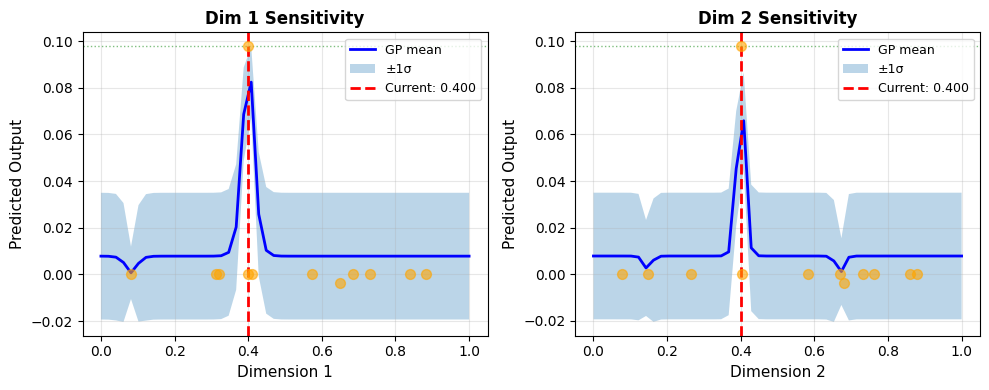

/opt/homebrew/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:450: ConvergenceWarning: The optimal value found for dimension 1 of parameter k2__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(




Function 2 (2D) - Sensitivity Analysis
Baseline (best point): [0.700073 0.125362]
Baseline output: 0.613847

Dimension 1: Max gradient = 0.2651 (flat - less important)
Dimension 2: Max gradient = 0.0000 (flat - less important)


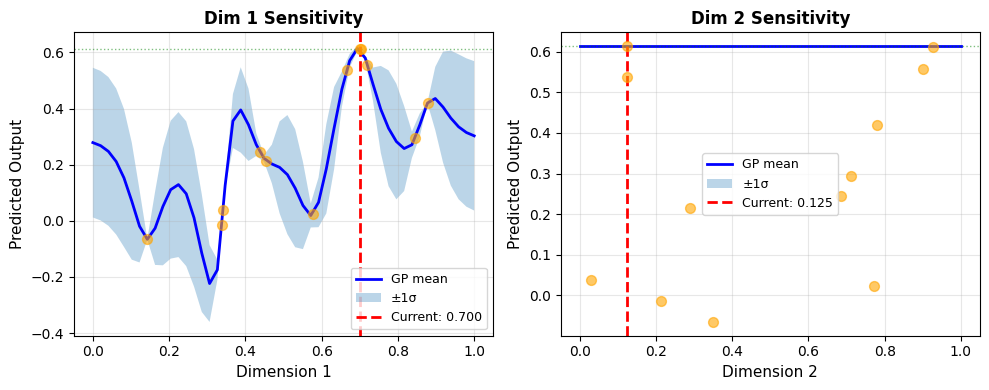



Function 3 (3D) - Sensitivity Analysis
Baseline (best point): [0.49258141 0.61159319 0.34017639]
Baseline output: -0.034835

Dimension 1: Max gradient = 0.0052 (flat - less important)
Dimension 2: Max gradient = 0.0000 (flat - less important)
Dimension 3: Max gradient = 0.0257 (flat - less important)


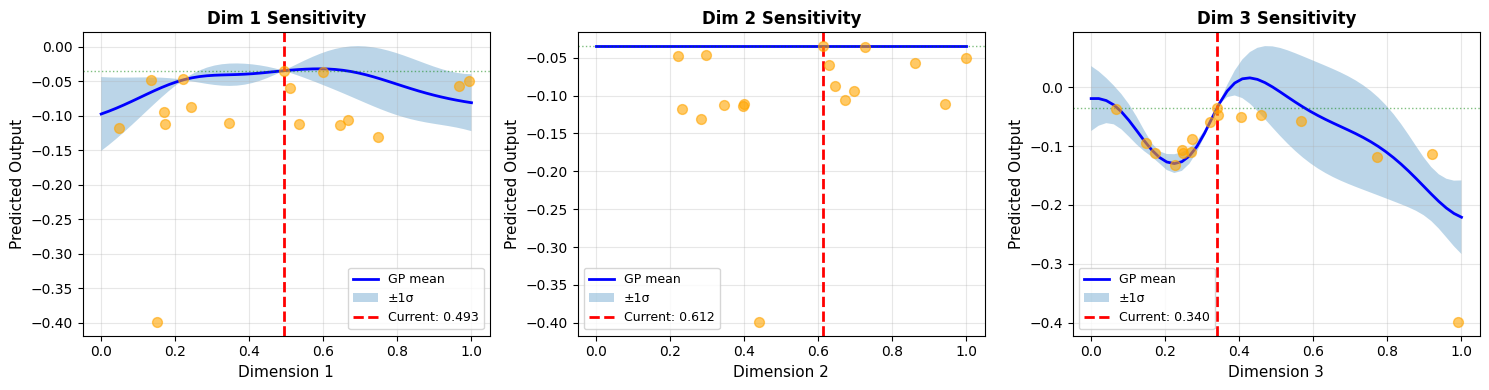



Function 4 (4D) - Sensitivity Analysis
Baseline (best point): [0.431409 0.391102 0.432466 0.377774]
Baseline output: 0.352325

Dimension 1: Max gradient = 0.8226 (flat - less important)
Dimension 2: Max gradient = 0.8800 (flat - less important)
Dimension 3: Max gradient = 1.0304 (steep - important)
Dimension 4: Max gradient = 0.9438 (flat - less important)


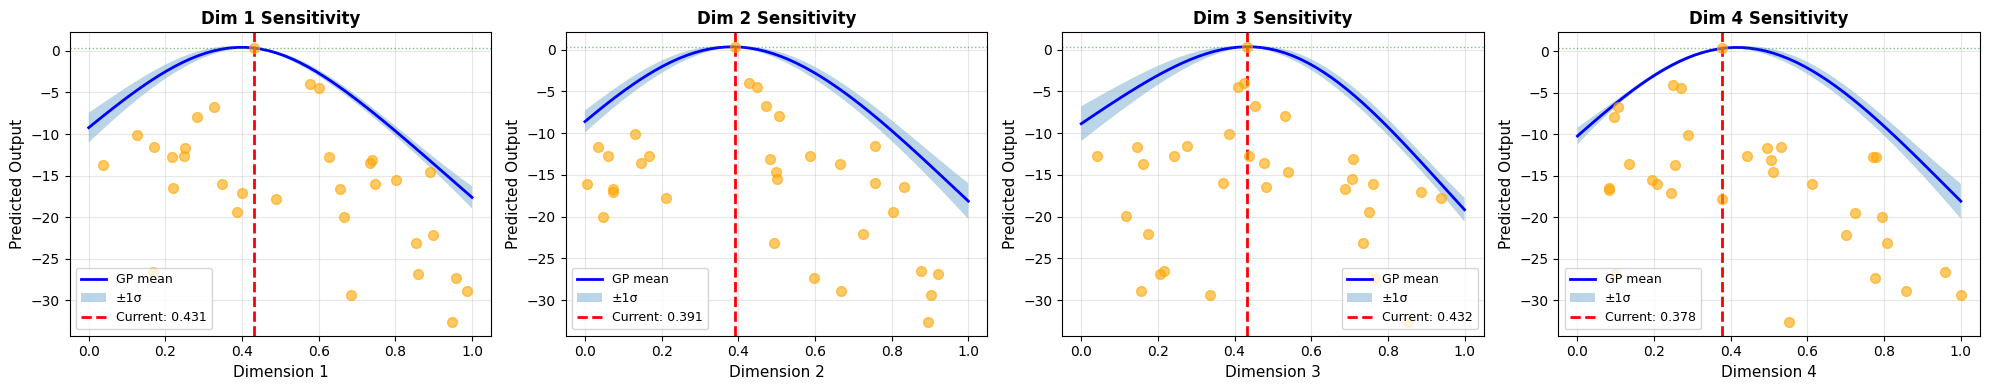



Function 5 (4D) - Sensitivity Analysis
Baseline (best point): [0.381844 0.303415 1.       1.      ]
Baseline output: 1688.068784

Dimension 1: Max gradient = 0.0000 (flat - less important)
Dimension 2: Max gradient = 0.1749 (flat - less important)
Dimension 3: Max gradient = 45.6140 (steep - important)
Dimension 4: Max gradient = 98.9834 (steep - important)


/opt/homebrew/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:450: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


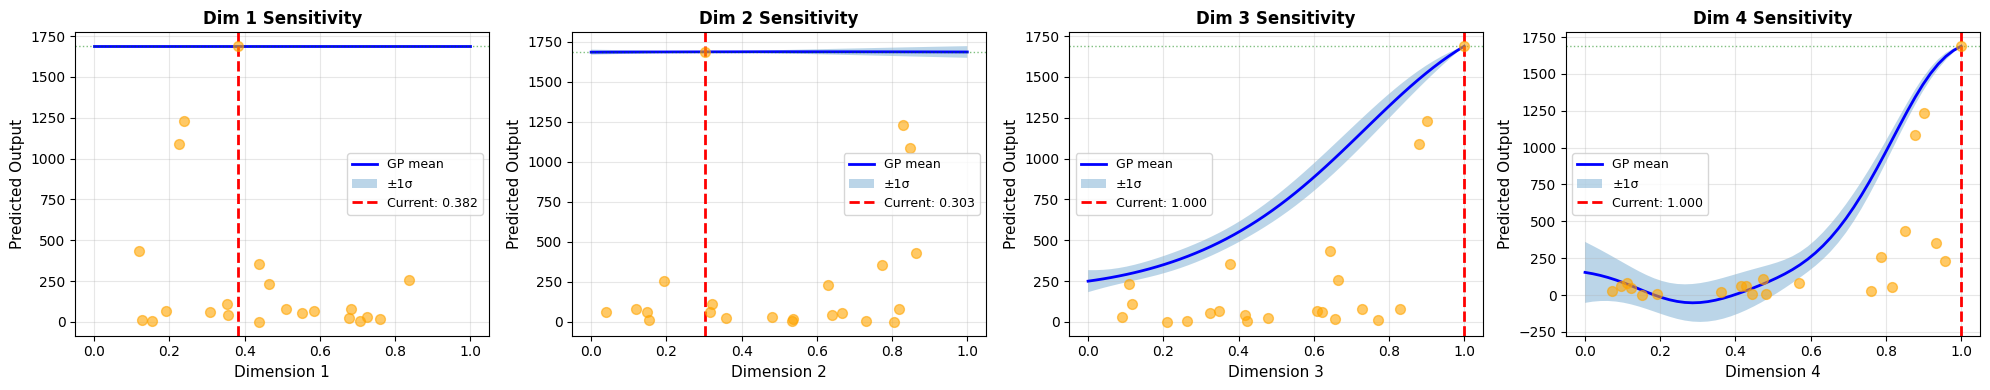



Function 6 (5D) - Sensitivity Analysis
Baseline (best point): [0.755469 0.27058  0.644099 0.672228 0.162862]
Baseline output: -0.520988

Dimension 1: Max gradient = 0.0000 (flat - less important)
Dimension 2: Max gradient = 0.0493 (flat - less important)
Dimension 3: Max gradient = 0.0290 (flat - less important)
Dimension 4: Max gradient = 0.0369 (flat - less important)
Dimension 5: Max gradient = 0.0647 (flat - less important)


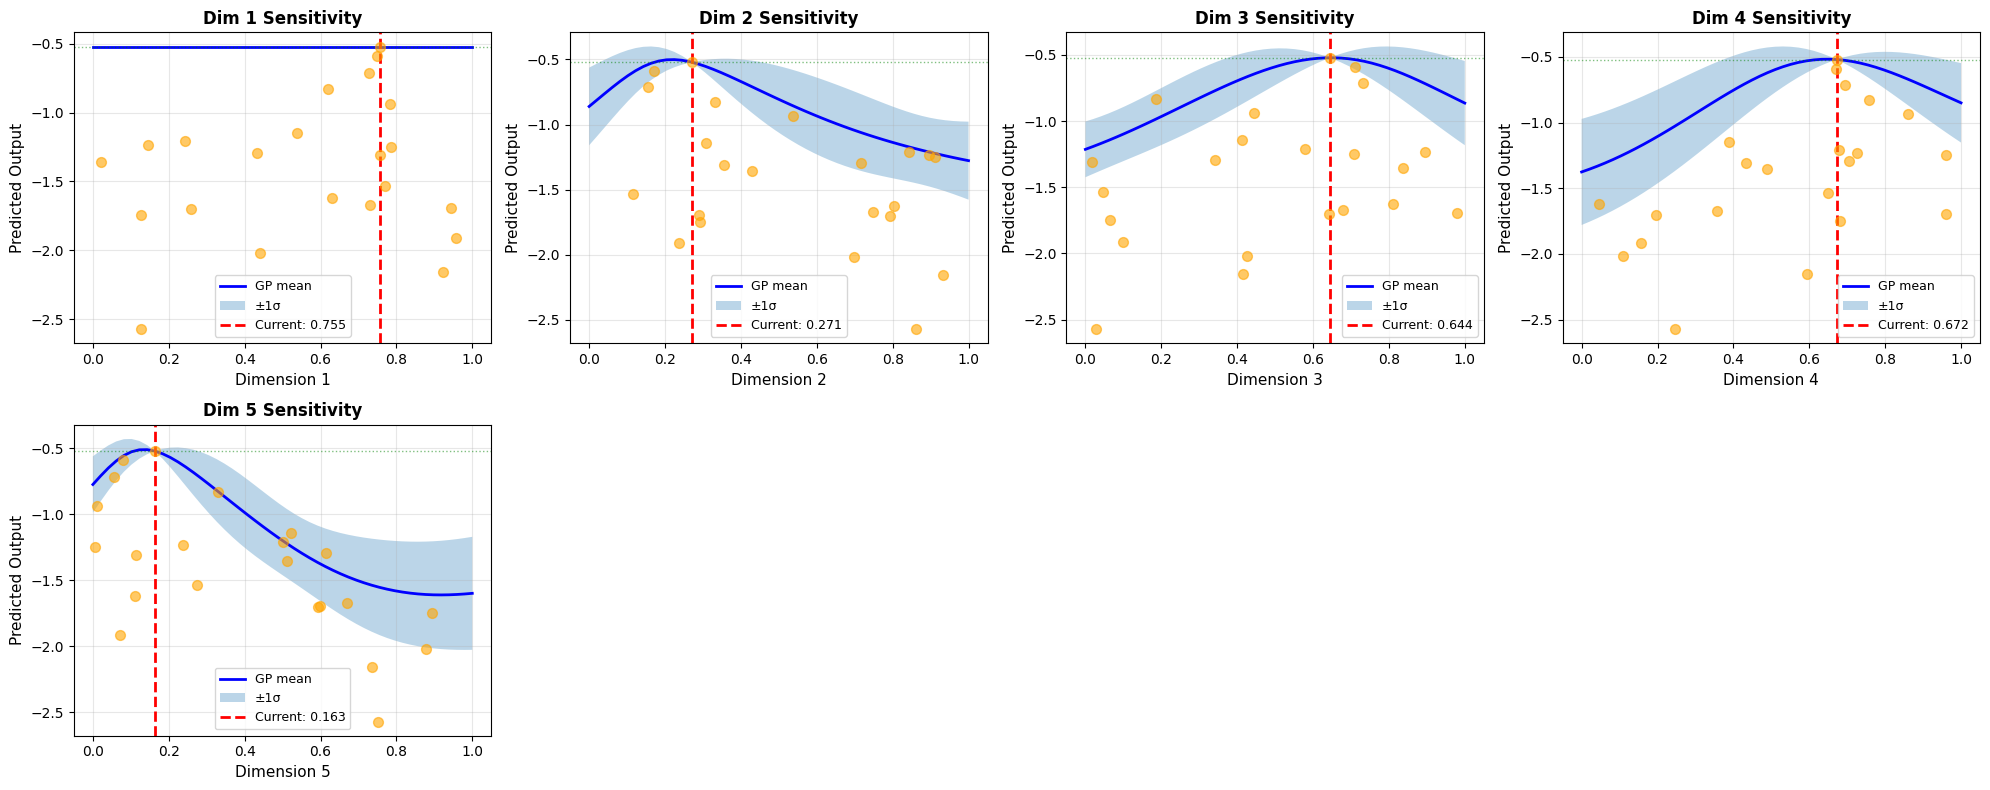



Function 7 (6D) - Sensitivity Analysis
Baseline (best point): [0.       0.342263 0.707844 0.246481 0.405689 0.778028]
Baseline output: 1.784483

Dimension 1: Max gradient = 0.0293 (flat - less important)
Dimension 2: Max gradient = 0.0612 (flat - less important)
Dimension 3: Max gradient = 0.0000 (flat - less important)
Dimension 4: Max gradient = 0.0449 (flat - less important)
Dimension 5: Max gradient = 0.0884 (flat - less important)
Dimension 6: Max gradient = 0.0446 (flat - less important)


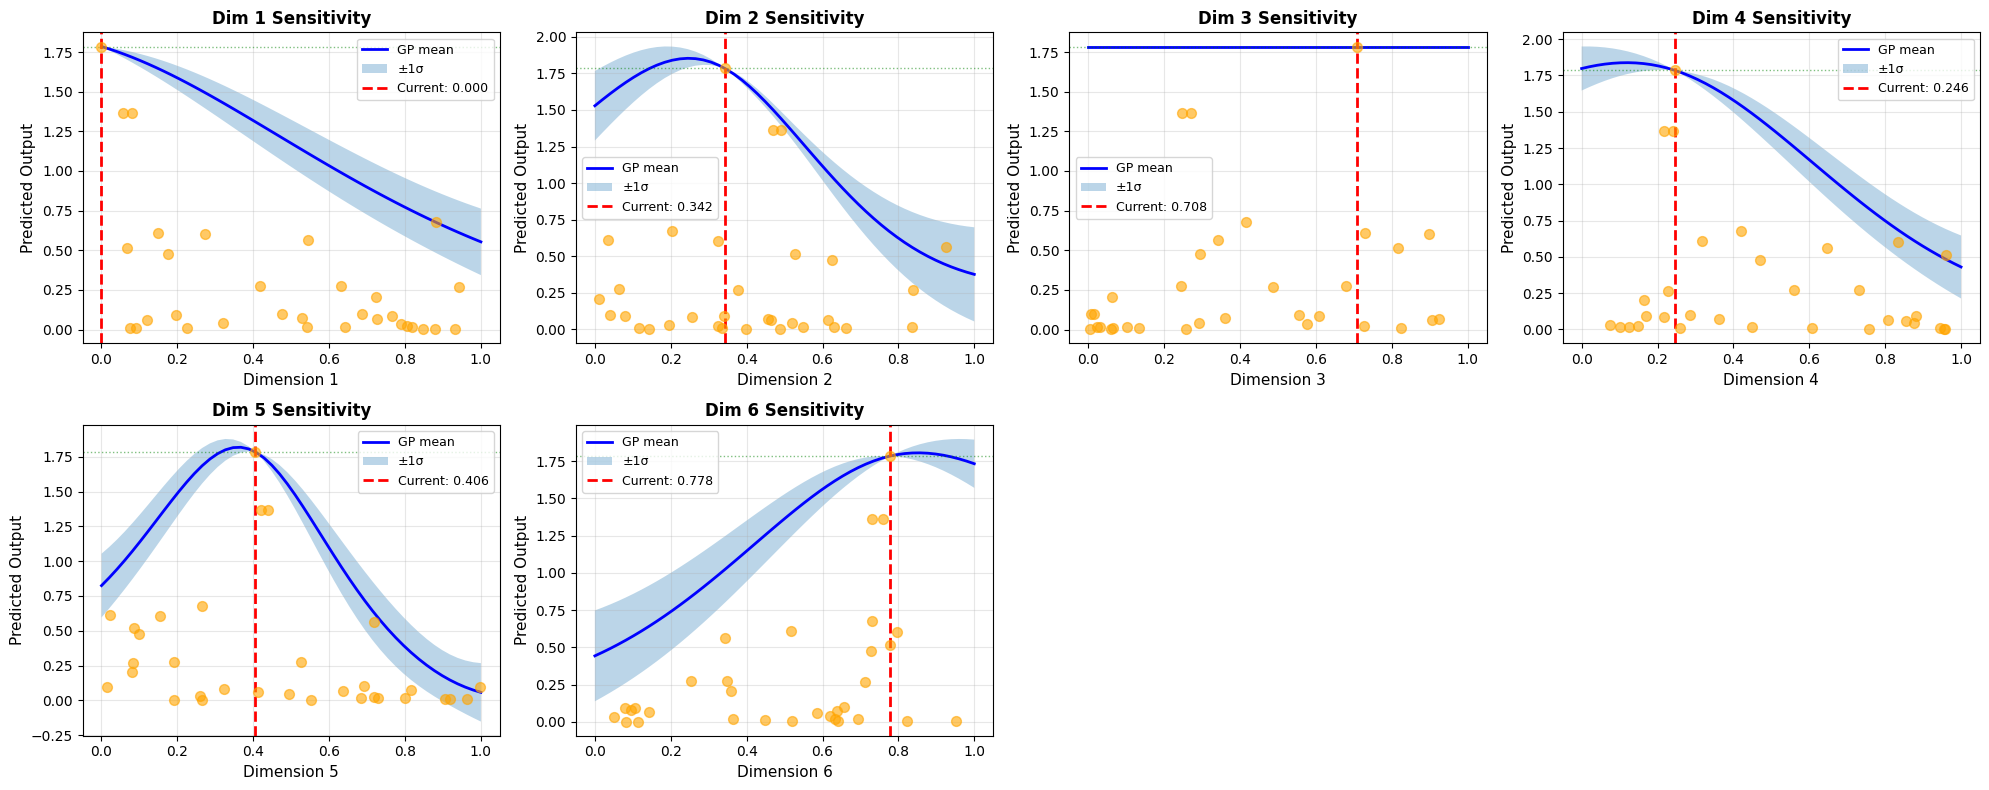



Function 8 (8D) - Sensitivity Analysis
Baseline (best point): [0.044443 0.140302 0.       0.042659 1.       0.088025 0.       0.953632]
Baseline output: 9.649282

Dimension 1: Max gradient = 0.0506 (flat - less important)
Dimension 2: Max gradient = 0.0173 (flat - less important)
Dimension 3: Max gradient = 0.0677 (flat - less important)
Dimension 4: Max gradient = 0.0250 (flat - less important)
Dimension 5: Max gradient = 0.0063 (flat - less important)
Dimension 6: Max gradient = 0.0000 (flat - less important)
Dimension 7: Max gradient = 0.0389 (flat - less important)
Dimension 8: Max gradient = 0.0000 (flat - less important)


/opt/homebrew/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:450: ConvergenceWarning: The optimal value found for dimension 5 of parameter k2__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/homebrew/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:450: ConvergenceWarning: The optimal value found for dimension 7 of parameter k2__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


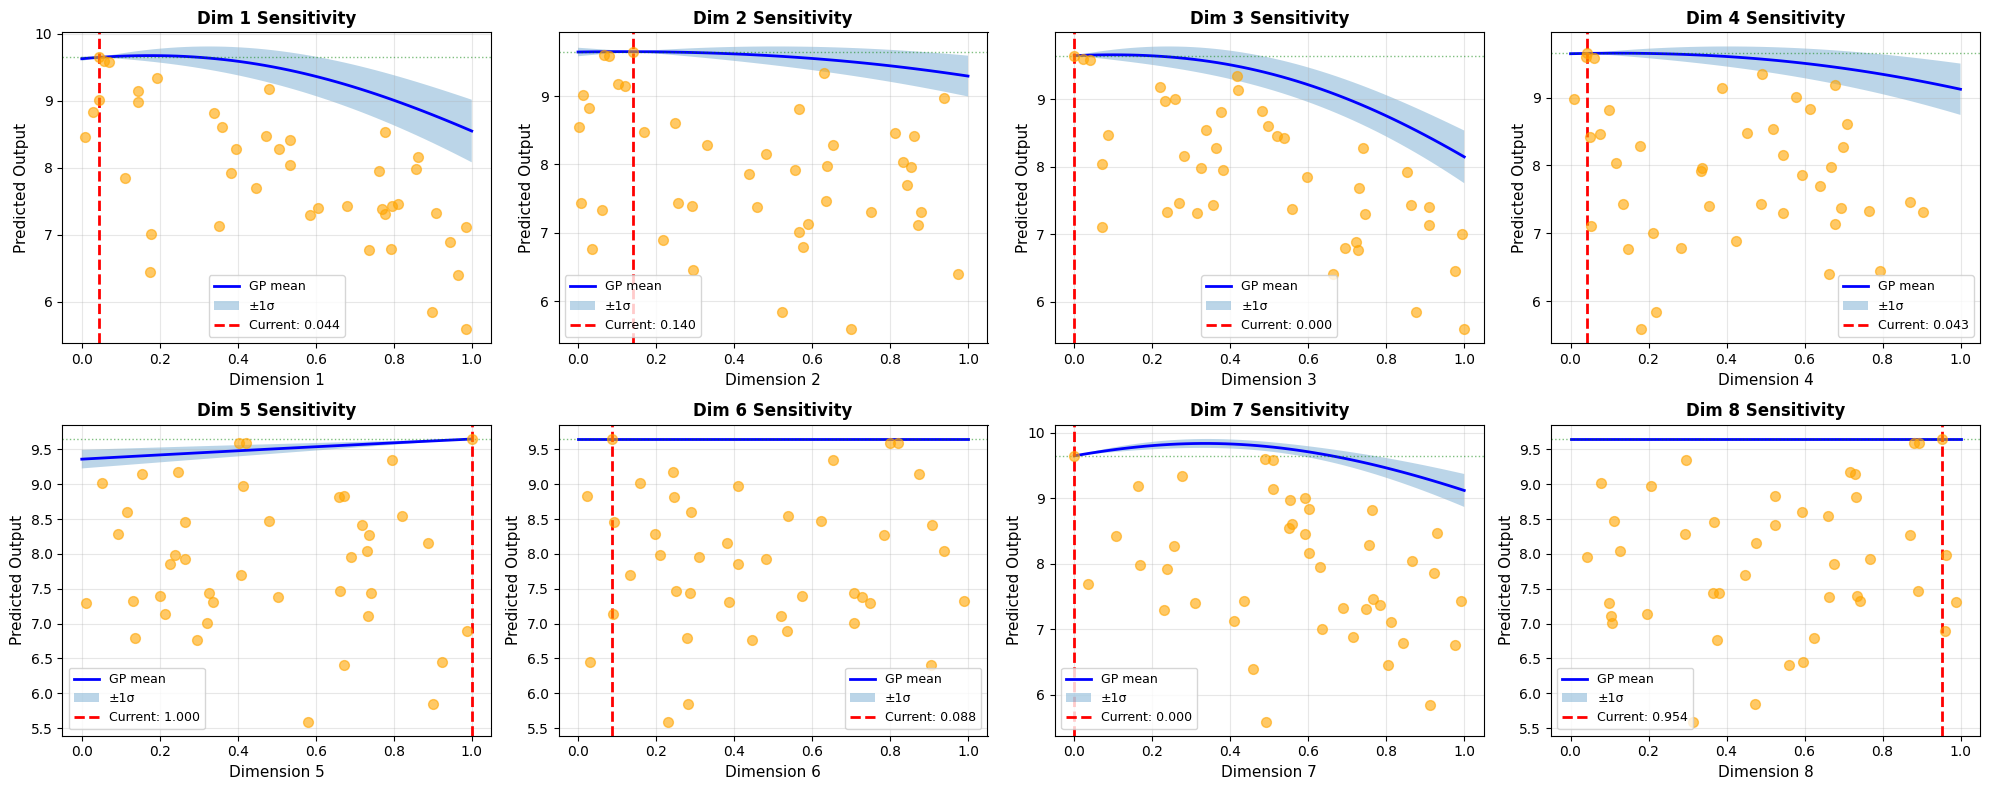

In [52]:
from utils.sensitivity import sensitivity_analysis

for func_id in range(1, 9):
    sensitivity_analysis(func_id, inputs[func_id], outputs[func_id])

## 6. Sensitivity Analysis Findings

### What the gradients tell us

| Function | Gradient Pattern | Diagnosis | Decision |
|----------|-----------------|-----------|----------|
| F1 (2D) | Both dims = 0.0000 | GP can't model the narrow peak. Convergence warnings (lower bound) confirm the kernel tries to shrink length_scale to fit a sharp spike, but fails. | **Local search** near [0.4, 0.4] with constrained bounds (±0.15). The GP is unreliable here, so we stay close to the only known good point. |
| F2 (2D) | Dim 1 = 0.134, Dim 2 = 0.001 | Dim 1 has slight sensitivity — the function responds to changes along x1. Dim 2 is effectively flat near the best point. | **Constrained search** — give dim 1 wider range (±0.25) since it's the sensitive direction, keep dim 2 tighter (±0.15). |
| F3 (3D) | All flat (max = 0.087 in dim 3) | Stuck on plateau at -0.035. The GP sees no gradient anywhere — either the function is truly flat in this region, or we haven't found the right area. | **Wide exploration** (xi=0.05) with full [0,1] bounds. Need to escape the plateau by searching new regions. |
| F4 (4D) | Dim 3 steep (1.03), others borderline (0.82-0.94) | All dimensions matter, with dim 3 being most important. The breakthrough point [0.43, 0.39, 0.43, 0.38] is in a sensitive region — moving too far causes collapse (original rec predicted -8.97). | **Constrained near breakthrough** (±0.15, ±0.10 for steep dim 3). Small refinements around the working point. |
| F5 (4D) | Dims 3&4 very steep (45.6, 98.9), Dims 1&2 flat (0.0, 0.17) | Dims 3&4 are critical and already at boundary 1.0. The original rec dropped dim 4 to 0.42, predicting only 25 vs best of 1688 — sensitivity analysis caught this mistake. | **Lock dims 3&4 near 1.0** [0.9, 1.0], explore only the flat dims 1&2 freely. |
| F6 (5D) | All flat (max = 0.065) | Near a plateau at -0.521. No strong directional signal. | **Fine-tune** near best point (±0.15) with exploitation (xi=0.001). |
| F7 (6D) | All flat (max = 0.088) | Near convergence at 1.784. The original rec already predicted improvement (1.942). | **Fine-tune** with UCB (kappa=0.5), constrained ±0.12 around best. |
| F8 (8D) | All flat (max = 0.068) | Near convergence at 9.649. Convergence warnings on dims 5&7 (upper bound) suggest these dims are irrelevant. | **Fine-tune** with UCB (kappa=0.5), constrained ±0.10 around best. |

### Key insight

Sensitivity analysis acts as a **safety check** on the BO recommendations. Without it:
- Function 5 would have moved dim 4 from 1.0 to 0.42 (predicted 25 vs best 1688)
- Function 4 would have moved far from the breakthrough (predicted -8.97 vs best 0.35)

By constraining the search bounds based on gradient information, we prevent the optimizer from making destructive moves in important dimensions while still allowing exploration in flat/unimportant ones.

## 7. Improved Recommendations (Sensitivity-Constrained)

Use gradient information to constrain search bounds:
- **Steep gradients at boundary** → lock dimension near optimal value
- **Flat gradients + good performance** → fine-tune near best point
- **Flat gradients + poor performance** → wider exploration
- **All flat + very poor** → constrained local search (GP unreliable)

In [ ]:
import warnings
from utils.bayesian_optimization import fit_gp, propose_next_point

improved_recs = {}

# Sensitivity-constrained bounds per function
strategies = {
    1: {'acq': 'EI', 'xi': 0.05,  'kappa': 1.0, 'radius': 0.15},  # narrow peak, local search
    2: {'acq': 'EI', 'xi': 0.01,  'kappa': 1.0, 'radius': 0.20},  # dim 1 sensitive
    3: {'acq': 'EI', 'xi': 0.05,  'kappa': 1.0, 'radius': None},  # stuck plateau, wide search
    4: {'acq': 'EI', 'xi': 0.01,  'kappa': 1.0, 'radius': 0.15},  # stay near breakthrough
    5: {'acq': 'EI', 'xi': 0.001, 'kappa': 1.0, 'radius': None},  # lock dims 3&4
    6: {'acq': 'EI', 'xi': 0.001, 'kappa': 1.0, 'radius': 0.15},  # fine-tune
    7: {'acq': 'UCB', 'xi': 0.01, 'kappa': 0.5, 'radius': 0.12},  # fine-tune
    8: {'acq': 'UCB', 'xi': 0.01, 'kappa': 0.5, 'radius': 0.10},  # fine-tune
}

for func_id in range(1, 9):
    X, y = inputs[func_id], outputs[func_id]
    dim = X.shape[1]
    best_idx = np.argmax(y)
    best_point = X[best_idx].copy()
    s = strategies[func_id]

    # Set bounds based on radius (None = full [0,1])
    bounds = np.array([[0.0, 1.0]] * dim)
    if s['radius']:
        r = s['radius']
        for d in range(dim):
            bounds[d] = [max(0, best_point[d] - r), min(1, best_point[d] + r)]

    # Function 5: lock steep dims 3&4 near 1.0
    if func_id == 5:
        bounds[2] = [0.90, 1.0]
        bounds[3] = [0.90, 1.0]

    with warnings.catch_warnings():
        warnings.simplefilter('ignore')
        next_point, gp = propose_next_point(
            X, y, bounds, acq_func=s['acq'], xi=s['xi'], kappa=s['kappa'], n_restarts=50
        )

    improved_recs[func_id] = next_point
    pred = gp.predict(next_point.reshape(1, -1))[0]
    print(f'F{func_id}: {next_point} | pred={pred:.4f} | best={y[best_idx]:.4f}')

print('\n--- SUBMISSION FORMAT ---')
for fid in range(1, 9):
    print(f"Function {fid}: {'-'.join(f'{x:.6f}' for x in improved_recs[fid])}")
